# WebMap services and layer-switching


- add WebMap services using ``m.add_wms`` and ``m.add_wmts``
- compare different data-layers and WebMap services using ``m.cb.click.peek_layer`` and ``m.cb.keypress.switch_layer``


![image](../../../_static/example_images/example_webmaps.gif)


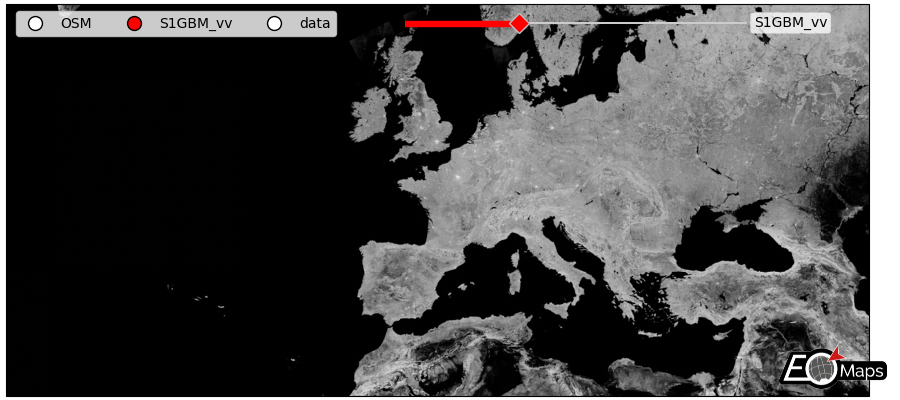

In [1]:
# EOmaps example: WebMap services and layer-switching

from eomaps import Maps
import numpy as np
import pandas as pd

# ------ create some data --------
lon, lat = np.meshgrid(np.linspace(-50, 50, 150), np.linspace(30, 60, 150))
data = pd.DataFrame(
    dict(lon=lon.flat, lat=lat.flat, data=np.sqrt(lon**2 + lat**2).flat)
)
# --------------------------------

m = Maps(Maps.CRS.GOOGLE_MERCATOR, layer="S1GBM_vv", figsize=(9, 4))
# set the crs to GOOGLE_MERCATOR to avoid reprojecting the WebMap data
# (makes it a lot faster and it will also look much nicer!)

# add S1GBM WebMap to the layer of this Maps-object
m.add_wms.S1GBM.add_layer.vv()

# add OpenStreetMap on the currently invisible layer (OSM)
m.add_wms.OpenStreetMap.add_layer.default(layer="OSM")

# create a new layer named "data" and plot some data
m2 = m.new_layer(layer="data")
m2.set_data(data=data.sample(5000), x="lon", y="lat", crs=4326)
m2.set_shape.geod_circles(radius=20000)
m2.plot_map()


# -------- CALLBACKS ----------
# (use m.all to execute independent of the visible layer)
# on a left-click, show layers ("data", "OSM") in a rectangle
m.all.cb.click.attach.peek_layer(layer="OSM|data", how=0.2)

# on a right-click, "swipe" the layers ("S1GBM_vv" and "data") from the left
m.all.cb.click.attach.peek_layer(
    layer="S1GBM_vv|data",
    how="left",
    button=3,
)

# switch between the layers by pressing the keys 0, 1 and 2
m.all.cb.keypress.attach.switch_layer(layer="S1GBM_vv", key="0")
m.all.cb.keypress.attach.switch_layer(layer="OSM", key="1")
m.all.cb.keypress.attach.switch_layer(layer="data", key="2")

# add a pick callback that is only executed if the "data" layer is visible
m2.cb.pick.attach.annotate(zorder=100)  # use a high zorder to put it on top

# ------ UTILITY WIDGETS --------
# add a clickable widget to switch between layers
m.util.layer_selector(
    loc="upper left",
    ncol=3,
    bbox_to_anchor=(0.01, 0.99),
    layers=["OSM", "S1GBM_vv", "data"],
)
# add a slider to switch between layers
s = m.util.layer_slider(
    pos=(0.5, 0.93, 0.38, 0.025),
    color="r",
    handle_style=dict(facecolor="r"),
    txt_patch_props=dict(fc="w", ec="none", alpha=0.75, boxstyle="round, pad=.25"),
)

# explicitly set the layers you want to use in the slider
# (Note: you can also use combinations of multiple existing layers!)
s.set_layers(["OSM", "S1GBM_vv", "data", "OSM|data{0.5}"])

# ------------------------------

m.add_logo()

m.apply_layout(
    {
        "figsize": [9.0, 4.0],
        "0_map": [0.00625, 0.01038, 0.9875, 0.97924],
        "1_slider": [0.45, 0.93, 0.38, 0.025],
        "2_logo": [0.865, 0.02812, 0.12, 0.11138],
    }
)

# fetch all layers before startup so that they are already cached
m.fetch_layers()
m.show()